# Importação de dados

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold, \
                                    cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [154]:
dados_treino = pd.read_csv('base_dados/train.csv')
dados_teste = pd.read_csv('base_dados/test.csv')
dados_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
print('Base de treino - total de linhas: ' + str(dados_treino.shape[0]))
print('Base de treino - total de colunas: ' + str(dados_treino.shape[1]))
print('Base de teste - total de linhas: ' + str(dados_teste.shape[0]))
print('Base de teste - total de colunas: ' + str(dados_teste.shape[1]))

Base de treino - total de linhas: 891
Base de treino - total de colunas: 12
Base de teste - total de linhas: 418
Base de teste - total de colunas: 11


In [156]:
# analisando as colunas base de treino
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
dados_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [158]:
# analisando os valores das colunas Survived, Pclass, Sex, Age, SibSp, Parch, Embarked 
for column in dados_treino.columns:
    if column in ('PassengerId', 'Name', 'Fare', 'Ticket', 'Cabin'):
        continue
    print(dados_treino[column].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [159]:
dados_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Parece que existe outliers em Fare. Vou confirmar analisando um gráfico

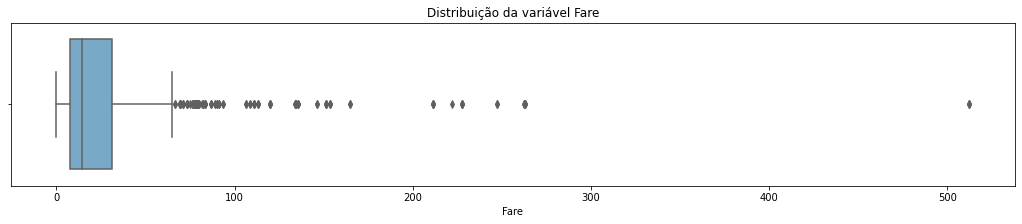

In [160]:
plt.figure(figsize=(18,3))
ax = sns.boxplot(x='Fare', data=dados_treino, palette='Blues')
ax.set_title('Distribuição da variável Fare')
plt.show()

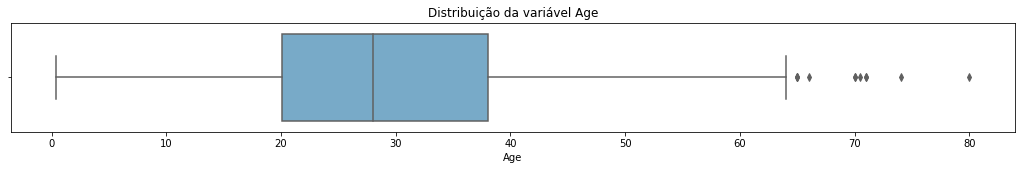

In [161]:
plt.figure(figsize=(18,2))
ax = sns.boxplot(x='Age', data=dados_treino, palette='Blues')
ax.set_title('Distribuição da variável Age')
plt.show()

## Análise da correlação entre as variáveis

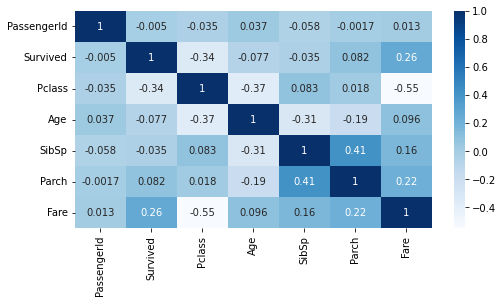

In [162]:
plt.figure(figsize=(8,4))
sns.heatmap(dados_treino.corr(), annot=True, cmap='Blues')
plt.show()

Existe correlação positiva entre SibSp e March e negativa entre Pclass e Fare

## Juntando as duas bases para efetuar as alterações
Unindo os dados pra efetuar as tranformações apenas uma vez 

In [163]:
# incluir a coluna Survived na base de teste com valor 99
dados_teste['Survived'] = 99
dados_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,99
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,99
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,99
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,99
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,99


In [164]:
# salvando a coluna PassengerId para submissão posterior
id_passenger = dados_teste['PassengerId']

In [165]:
# concatenando as bases de treino e teste
dados_full = pd.concat([dados_treino, dados_teste]).reset_index(drop=True)
dados_full.shape

(1309, 12)

## Coluna Titulo
Coluna criada a partir do título nos nomes dos passageiros. Os que mais aparecem são: Mr., Mrs., Master, Miss e o restante vou substituir por 'Others'

In [166]:
# variável com o nome dos títulos
dados_full['Titulo'] = dados_full.Name.str.extract('([A-Za-z]+)\.')
# exclui os 4 nomes mais frequentes
nome_titulo = dados_full['Titulo'].value_counts()[4:].index
# substitui o restante de títulos por 'Others'
dados_full['Titulo'] = dados_full['Titulo'].replace(nome_titulo, 'Others')
# mapeamento para valores numéricos
titulos_mapeados = {'Mr': 0, 'Mrs': 1, 'Master': 2, 'Miss': 3, 'Others': 4}
dados_full['Titulo'] = dados_full['Titulo'].map(titulos_mapeados)

## Coluna Age
Existem muitos registros nulos na coluna Age. Os valores faltantes serão inferidos a partir da coluna título.

In [167]:
# média das idades agrupadas por título
medias_por_titulo = dados_full.groupby(['Titulo'])['Age'].mean()
for i , value in enumerate(medias_por_titulo.index):
    filtro = (dados_full['Titulo'] == value) & (dados_full['Age'].isnull())
    dados_full.loc[filtro, 'Age'] = medias_por_titulo[i]

In [168]:
# faixa de idade dos passageiros
dados_full['Age'] = pd.qcut(dados_full['Age'], 6, labels=[0, 1, 2, 3, 4, 5])

## Colunas SibSp e March
Criando uma coluna Relatives a partir das colunas SibSp e March

In [169]:
dados_full['Relatives'] = dados_full['SibSp'] + dados_full['Parch']

## Coluna Sex
Transformando a coluna Sex em 0 e 1

In [170]:
sex = {
    'female': 0,
    'male': 1
}
dados_full['Sex'] = dados_full['Sex'].map(sex)

## Coluna Fare
Preenchendo com a média dos valores e definindo uma faixa de valores

In [171]:
media = dados_full['Fare'].mean()
dados_full['Fare'] = dados_full['Fare'].fillna(media)
# faixa das tarifas dos passageiros
dados_full['Fare'] = pd.qcut(dados_full['Fare'], 6, labels=[0, 1, 2, 3, 4, 5])

## Coluna Embarked

In [172]:
# preenchendo linhas nulas com a média da coluna
dados_full['Embarked'].fillna(dados_full['Embarked'].value_counts().index[0], inplace=True)
# transformando os valores da coluna Embarked em colunas
embarked = {
    'C': 0,
    'Q': 1,
    'S': 2
}
dados_full['Embarked'] = dados_full['Embarked'].map(embarked)

## Excluindo colunas
* a coluna Cabin não tem a maioria das informações
* as colunas PassengerId, Name, Titulo e Ticket possuem valores únicos e não interessam para a análise
* SibSp e Parch foram unidas em outras coluna

In [173]:
dados_full = dados_full.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis = 1)

In [174]:
dados_full.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Titulo,Relatives
0,0,3,1,1,0,2,0,1
1,1,1,0,4,5,0,1,1
2,1,3,0,2,1,2,3,0
3,1,1,0,4,4,2,1,1
4,0,3,1,4,1,2,0,0


## Separando novamente as bases em treino e teste

In [175]:
dados_treino = dados_full[dados_full['Survived'] != 99].copy()
dados_teste = dados_full[dados_full['Survived'] == 99].copy()
dados_teste = dados_teste.drop('Survived', axis=1)
print('Base de treino: ' + str(dados_treino.shape))
print('Base de teste: ' + str(dados_teste.shape))

Base de treino: (891, 8)
Base de teste: (418, 7)


In [176]:
# preparando os dados de treinamento
y = dados_treino['Survived']
x = dados_treino.drop(['Survived'], axis=1) 

In [177]:
# DecisionTreeClasifier
SEED = 42
cv = StratifiedKFold(shuffle=True, random_state=SEED)
dtc = DecisionTreeClassifier(max_depth=5)
scores = cross_validate(dtc, x, y, cv = cv)
print('Acurácia: ' + str(scores['test_score'].mean()))

Acurácia: 0.8305065595380074


In [178]:
# RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, random_state= SEED)
scores = cross_validate(rfc, x, y, cv = cv)
print('Acurácia: ' + str(scores['test_score'].mean()))

Acurácia: 0.8316552633230808


## Otimização dos hiperparâmetros

In [179]:
hiperparametros = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': list(range(5, 11)),
        'min_samples_split': list(range(2, 21)),
        'min_samples_leaf': list(range(1, 21)),
        'bootstrap': [False, True], 
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2']
}
busca = RandomizedSearchCV(RandomForestClassifier(),
                            hiperparametros,
                            n_iter= 100,
                            cv = StratifiedKFold(n_splits = 5, shuffle=True),
                            random_state=SEED)
busca.fit(x, y)
busca.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': True}

In [180]:
scores = cross_val_score(busca.best_estimator_, x, y, cv = cv)
scores.mean()

0.8316489862532169

Selecionando o melhor modelo

In [181]:
modelo = busca.best_estimator_
modelo.fit(x, y)
y_previsto = modelo.predict(dados_teste)

## Preparando os dados para submissão

In [182]:
submissao = pd.concat([id_passenger, pd.Series(y_previsto)], axis = 1)
submissao.columns = ['PassengerId', 'Survived']
submissao.to_csv('base_dados/submission.csv', index=False)